# Linear Regression Project

___
Lets consider a hypothetical case where we have to analyze the data of an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

Lets analyze the customer data (it's fake, I didn't use real credit card numbers or emails).

### Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Fetching the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv("Ecommerce Customers")

Having a glance at the type of information stored in the data frame

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Creating a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

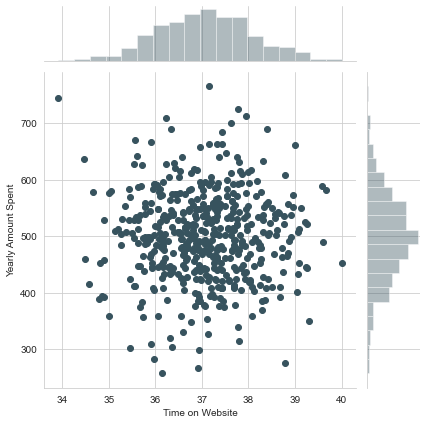

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

**Doing the same but with the Time on App column instead.**

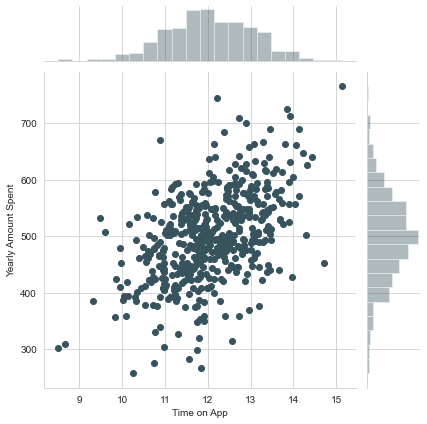

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

**Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

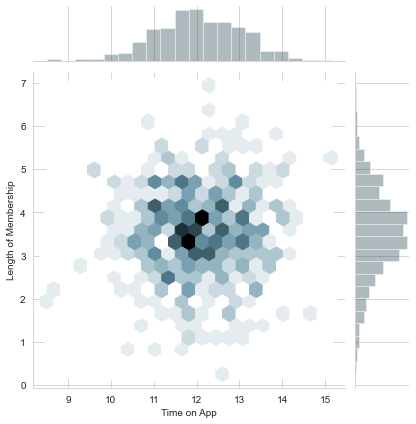

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers,kind="hex")

**Let's explore these types of relationships across the entire data set all at once!!**

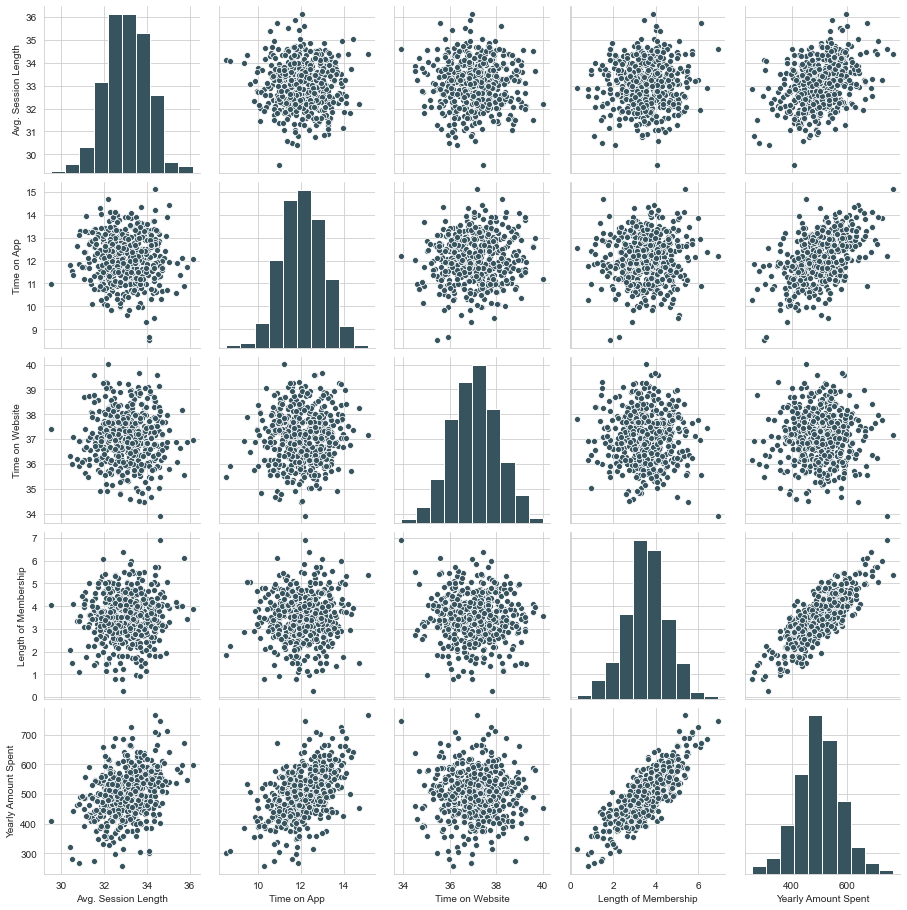

In [9]:
sns.pairplot(customers)

**Q : Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [10]:
#Ans : 'Length of Membership'

**Creating a linear model plot of  Yearly Amount Spent vs. Length of Membership.**

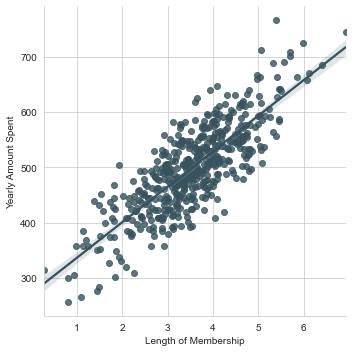

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

___
## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [13]:
#Having a glance at the total columns present in the dataset
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

For training our model to predict the relation(of numeric columns) with "Yearly Amount Spent" we seperate the data into X and y labels

In [14]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

Splitting the data for training and testing purpose(test data = 30% of whole data)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.3,random_state=101)

___
## Training the Model

Now its time to train our model on our training data!

In [17]:
from sklearn.linear_model import LinearRegression

Creating an instance of a LinearRegression() model named lm.

In [18]:
lm = LinearRegression()

Training the model on the training data.

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

**Printing out the coefficients of the model**

In [20]:
print('Coefficients: ', lm.coef_)

Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


___
## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [21]:
y_predicted = lm.predict(X_test)

Creating a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predcted Y')

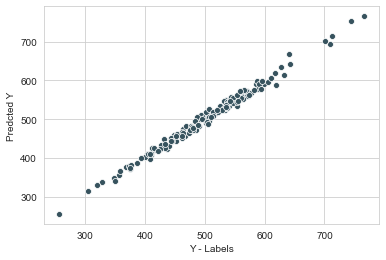

In [23]:
sns.scatterplot(y_test,y_predicted)
plt.xlabel('Y - Labels')
plt.ylabel('Predcted Y')

As it is almost a straight line it means our model is quite good fit for this dataset

____
## Evaluating the Model

Let's evaluate our model performance!!

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [24]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_predicted)
mse = metrics.mean_squared_error(y_test,y_predicted)
rmse = np.sqrt(mse)
print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)

MAE :  7.228148653430838
MSE :  79.81305165097461
RMSE :  8.933815066978642


These values are within acceptable range


## Residuals

We have got a good model with a quite good fit. Let's explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals to make sure that it looks normally distributed.**

<AxesSubplot:xlabel='Yearly Amount Spent'>

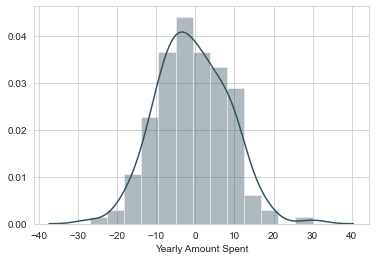

In [23]:
residuals = y_test - y_predicted
sns.distplot(residuals)

_____
## Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [24]:
pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**What does this data mean?**

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Should the company focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
